In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from io import StringIO
import io
from collections import namedtuple
from datetime import datetime,timedelta
import sys

   weekstart    weekend       Spend     Daily
0  01-Jan-18  07-Jan-18  34235.9220  4890.846
1  08-Jan-18  14-Jan-18  37359.6048  5337.086
2  15-Jan-18  21-Jan-18  38916.1164  5559.445
3  22-Jan-18  28-Jan-18  36903.8628  5271.980
Empty DataFrame
Columns: [Date, Amount]
Index: []
         Date    Amount
1  2018-01-01  4890.846
2  2018-01-02  4890.846
3  2018-01-03  4890.846
4  2018-01-04  4890.846
5  2018-01-05  4890.846
6  2018-01-06  4890.846
7  2018-01-07  4890.846
8  2018-01-08  5337.086
9  2018-01-09  5337.086
10 2018-01-10  5337.086
11 2018-01-11  5337.086
12 2018-01-12  5337.086
13 2018-01-13  5337.086
14 2018-01-14  5337.086
15 2018-01-15  5559.445
16 2018-01-16  5559.445
17 2018-01-17  5559.445
18 2018-01-18  5559.445
19 2018-01-19  5559.445
20 2018-01-20  5559.445
21 2018-01-21  5559.445
22 2018-01-22  5271.980
23 2018-01-23  5271.980
24 2018-01-24  5271.980
25 2018-01-25  5271.980
26 2018-01-26  5271.980
27 2018-01-27  5271.980
28 2018-01-28  5271.980


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_9772/3259226528.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  df2.set_index(pd.Index(index),'index',inplace=True)


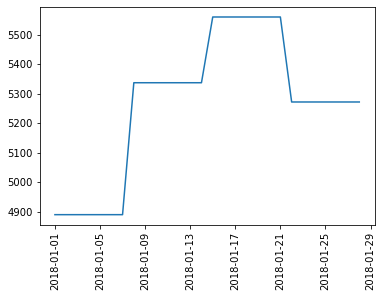

In [3]:
df = pd.DataFrame({
    'weekstart':['01-Jan-18','08-Jan-18','15-Jan-18','22-Jan-18'],
    'weekend':['07-Jan-18','14-Jan-18','21-Jan-18','28-Jan-18'],
    'Spend':[34235.922,37359.6048,38916.1164,36903.8628],
    'Daily':[4890.846,5337.086,5559.445,5271.98],
})
print(df)

df2=pd.DataFrame(columns=['Date','Amount'])
df2['Date']=pd.to_datetime(df2['Date'])
#df2.reset_index(level=0,inplace=True)
print(df2)

for key,value in df.iterrows():
    #print(key,value)
    amount=value['Daily']
    for date in pd.date_range(value['weekstart'], value['weekend']):
        #print(date)
        df2=df2.append({"Date":date,"Amount":amount},ignore_index=True)

index=range(1,len(df2)+1) 

df2.set_index(pd.Index(index),'index',inplace=True)
print(df2)

plt.plot(df2['Date'],df2['Amount'])
plt.xticks(rotation=90)
plt.show()

In [4]:
category = ['Car','Car','Car','Car','Truck','Truck','Truck']
name = ['Camry','Camry','Camry','Camry','Tacoma','Tundra','Tundra']
year = ['2007','2007','2008','2009','2010','2010','2011']
vals = [0.1,0.5,0.2,0.9,0.8,0.4,0.9]
df = pd.DataFrame({'Category': category,
                   'Name': name,
                   'Year': year,
                   'Vals': vals})

print(df.query("(Category=='Car' and Name=='Camry' and Year=='2007') or (Category=='Truck' and Name=='Tundra' and Year=='2010')"))

  Category    Name  Year  Vals
0      Car   Camry  2007   0.1
1      Car   Camry  2007   0.5
5    Truck  Tundra  2010   0.4


In [5]:
txt="firstname lastname (1937-2015)"
pattern=r'(\d{4}\-\d{4})+'

matches=re.findall(pattern,txt)
print(matches[0].split('-')[1])

2015


In [6]:
data = [['FRUIT', 'FRU', 100],['A.GRAPE','A.GRA', 50],['A.APPLE','A.APP', 50],
        ['VEGETABLE', 'VEG', 75],['A.TOMATO','A.TOM', 25],['A.CABBAGE','A.CAB', 25],['A.CARROT','A.CAR', 25]]
df = pd.DataFrame(data, columns = ['name', 'abbrevation', 'value'])

df['Category']=df['name'].apply(lambda x: x if x.isalpha() else None)
df.ffill(inplace=True)
print(df)

        name abbrevation  value   Category
0      FRUIT         FRU    100      FRUIT
1    A.GRAPE       A.GRA     50      FRUIT
2    A.APPLE       A.APP     50      FRUIT
3  VEGETABLE         VEG     75  VEGETABLE
4   A.TOMATO       A.TOM     25  VEGETABLE
5  A.CABBAGE       A.CAB     25  VEGETABLE
6   A.CARROT       A.CAR     25  VEGETABLE


In [7]:
print("find the floating point number")
txt="200.20356AVAX"
pattern=r"\d+\.*\d*"
print(re.findall(pattern,txt))

find the floating point number
['200.20356']


In [8]:
print("create a list of words and special characters")

txt="""var a = "hello world" 
print("hello", "a")"""


txt=re.sub('\n','',txt)        
results=[]
buffer=[]
for char in txt:
    if char.isalpha()==False:
        if char!=' ':
            results.append(char)
        if len(buffer)>0:
            results.append("".join(buffer))
        buffer.clear()
    else:
        buffer.append(char)
        
print(results)


create a list of words and special characters
['var', 'a', '=', '"', 'hello', '"', 'world', '(', 'print', '"', '"', 'hello', ',', '"', '"', 'a', ')']


In [9]:
print("convert to the year and quarter")
data='''yrmo
202101
202102
202103
202104
202105
202106
202109
202111'''
df = pd.read_csv(io.StringIO(data), sep=' \s+', engine='python')
month_year=pd.to_datetime(df['yrmo'],format="%Y%m")
df['DIST_PERIOD'] = month_year.dt.to_period("Q").dt.strftime('%Y%q')
print(df)

convert to the year and quarter
     yrmo DIST_PERIOD
0  202101       20211
1  202102       20211
2  202103       20211
3  202104       20212
4  202105       20212
5  202106       20212
6  202109       20213
7  202111       20214


In [10]:
list_of_strings = ["apple", "orange ca", "pear  sa", "banana    sth"]

my_list=[]
def find_phrase(list_of_strings):
    for string in list_of_strings:
        matches=re.findall(r"(\w+)( \w+)*", string)
        if len(matches)>0:
            my_list.append("".join([matches[0][0],matches[0][1]]))
    return my_list
            
print(find_phrase(list_of_strings))

['apple', 'orange ca', 'pear', 'banana']


In [11]:
txt="a b c private d e f g protected h i j k public l m n o p"

pattern=r"(public)|(private)|(protected)"

matches=re.findall(pattern,txt)
for match in matches:
    print(match)

('', 'private', '')
('', '', 'protected')
('public', '', '')


In [12]:
print("Look behind for the phrase MFG:")
txt="MFG: acme, something else, MFG: initech"
pattern=r"(?<=MFG\:)\s+\w+"
matches=re.findall(pattern,txt)
for match in matches:
    print(match)

Look behind for the phrase MFG:
 acme
 initech


In [13]:
strs = ['america','e', 'E', 'world','hello','welcome','board','know']
pattern="(?:(?!e)[a-z])+"
for item in strs:
    print(item,re.search(pattern,item))


america <re.Match object; span=(0, 2), match='am'>
e None
E None
world <re.Match object; span=(0, 5), match='world'>
hello <re.Match object; span=(0, 1), match='h'>
welcome <re.Match object; span=(0, 1), match='w'>
board <re.Match object; span=(0, 5), match='board'>
know <re.Match object; span=(0, 4), match='know'>


In [14]:
data="""user_id,cat_id,prod_id,score,pref_prod
    29762,9,3115,1.000000,335.0
    29762,58,1335,1.000000,335.0
    234894,58,1335,1.000000,335.0
    413276,43,1388,1.000000,335.0
    413276,58,335,1.000000,335.0
    413276,73,26,1.000000,335.0
    9280593,9,137,1.000000,335.0
    9280593,58,1335,1.000000,335.0
    9280593,74,160,1.000000,335.0
    4554542,66,1612,0.166667,197.0
    4554542,66,1406,0.166767,197.0
    4554542,66,2021,1.000000,197.0"""

df = pd.read_csv(io.StringIO(data), sep=',')
print(df)


Record=namedtuple('Generic',['user_id','cat_id','prod_id','score','pref_prod'])

def map_to_record(row):
    return Record(row.user_id, row.cat_id, row.prod_id,row.score,row.pref_prod)

my_list = list(map(map_to_record, df.itertuples()))

def named_tuple_to_json(named_tuple):
    """
    convert a named tuple to a json tree structure
    """
    json_string="records:["
    for record in named_tuple:
        json_string+="{"
        json_string+="'user_id': {},'cat_id': {},'prod_id': {},'score': {},'pref_prod': {},".format(
        record.user_id,record.cat_id,record.prod_id,record.score,record.pref_prod)
        json_string+="},"
    json_string+="]"
    return json_string

# convert the list of named tuples to a json tree structure
json_tree = named_tuple_to_json(my_list)
print(json_tree)

    user_id  cat_id  prod_id     score  pref_prod
0     29762       9     3115  1.000000      335.0
1     29762      58     1335  1.000000      335.0
2    234894      58     1335  1.000000      335.0
3    413276      43     1388  1.000000      335.0
4    413276      58      335  1.000000      335.0
5    413276      73       26  1.000000      335.0
6   9280593       9      137  1.000000      335.0
7   9280593      58     1335  1.000000      335.0
8   9280593      74      160  1.000000      335.0
9   4554542      66     1612  0.166667      197.0
10  4554542      66     1406  0.166767      197.0
11  4554542      66     2021  1.000000      197.0
records:[{'user_id': 29762,'cat_id': 9,'prod_id': 3115,'score': 1.0,'pref_prod': 335.0,},{'user_id': 29762,'cat_id': 58,'prod_id': 1335,'score': 1.0,'pref_prod': 335.0,},{'user_id': 234894,'cat_id': 58,'prod_id': 1335,'score': 1.0,'pref_prod': 335.0,},{'user_id': 413276,'cat_id': 43,'prod_id': 1388,'score': 1.0,'pref_prod': 335.0,},{'user_id': 4132

In [15]:
#1;SMITH, JOHN;10/20/20 8:00 AM;10/20/20 9:30 AM
#2;SMITH, JOHN;10/20/20 9:20 AM;10/20/20 10:30 AM
#3;SMITH, JOHN;10/20/20 10:20 AM;10/20/20 11:00 AM
#4;COOPER, ALLEN;10/20/20 1:00 PM;10/20/20 2:15 PM
#5;PEREZ, HILL;10/20/20 3:15 PM;10/20/20 4:00 PM
#6;SMITH, JOHN;10/4/21 8:00 AM;10/20/21 9:30 AM
#7;SMITH, JOHN;10/4/21 9:20 AM;10/20/21 10:30 AM
#8;SMITH, JOHN;10/4/21 11:20 AM;10/20/21 12:00 PM
#9;SMITH, JOHN ;10/4/21 1:00 PM;10/20/21 2:15 PM
#10;SMITH, JOHN;10/4/21 3:15 PM;10/20/21 4:00 PM

df = pd.read_csv(io.StringIO("""
Record ID;Record Name;Record Start;Record End
1;SMITH, JOHN;10/20/20 8:00 AM;10/20/20 9:30 AM
2;SMITH, JOHN;10/20/20 9:20 AM;10/20/20 10:30 AM
3;SMITH, JOHN;10/20/20 10:20 AM;10/20/20 11:00 AM
4;COOPER, ALLEN;10/20/20 1:00 PM;10/20/20 2:15 PM
5;PEREZ, HILL;10/20/20 3:15 PM;10/20/20 4:00 PM
6;SMITH, JOHN;10/4/21 8:00 AM;10/20/21 9:30 AM
7;SMITH, JOHN;10/4/21 9:20 AM;10/20/21 10:30 AM
8;SMITH, JOHN;10/4/21 11:20 AM;10/20/21 12:00 PM
9;SMITH, JOHN ;10/4/21 1:00 PM;10/20/21 2:15 PM
10;SMITH, JOHN;10/4/21 3:15 PM;10/20/21 4:00 PM
"""),sep=';')

df['Record Start']=pd.to_datetime(df['Record Start'])
df['Record End']=pd.to_datetime(df['Record End'])

def create_datetime(date,hour,minute,second):
    month=date.month
    day=date.day
    year=date.year
    #month = int(txt.split("/")[0])
    #day = int(txt.split("/")[1])
    #year = int("20"+txt.split("/")[2].split(" ")[0])
    # datetime(year, month, day, hour, minute, second, microsecond)
    return datetime(year=year,month=month,day=day,hour=hour,minute=minute,second=second,microsecond=0)

def get_minutes(row):
    #start = datetime.strptime(row['Record Start'], '%m/%d/%y %H:%M %p')
    start=row['Record Start']
    start_end_of_day=create_datetime(row['Record Start'],23,59,59)
   
    #end = datetime.strptime(row['Record End'], '%m/%d/%y %H:%M %p')
    end = row['Record End']
    end_beginning_of_day=create_datetime(row['Record End'], 0,0,0)
    
    results=[start + timedelta(minutes=x) for x in range(0, round((end-start).total_seconds()//60)+1)]
      
    #for item in results:
    #    print(item)
    #sys.exit()
    return results

df['minutes'] = df.apply(get_minutes, axis=1)

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

prev_row=None
for index,row in df.iterrows():
    if index==0:
        df.loc[index,'Count']=1
    else:
        prev_row=df.iloc[index-1]
        
    if not prev_row is None:
        if prev_row['Record Name']==row['Record Name']:
            count=prev_row['Count']
            lst1=row['minutes']
            lst2=prev_row['minutes']
            if len(intersection(lst1,lst2))>0:
                df.loc[index,'Count']=count+1
            else:
                df.loc[index,'Count']=1
        else:
            df.loc[index,'Count']=1
        
#print(df[df['Count']>=3])   
print(df[['Record ID','Record Name', 'Record Start','Record End','Count']])
        


   Record ID    Record Name        Record Start          Record End  Count
0          1    SMITH, JOHN 2020-10-20 08:00:00 2020-10-20 09:30:00    1.0
1          2    SMITH, JOHN 2020-10-20 09:20:00 2020-10-20 10:30:00    2.0
2          3    SMITH, JOHN 2020-10-20 10:20:00 2020-10-20 11:00:00    3.0
3          4  COOPER, ALLEN 2020-10-20 13:00:00 2020-10-20 14:15:00    1.0
4          5    PEREZ, HILL 2020-10-20 15:15:00 2020-10-20 16:00:00    1.0
5          6    SMITH, JOHN 2021-10-04 08:00:00 2021-10-20 09:30:00    1.0
6          7    SMITH, JOHN 2021-10-04 09:20:00 2021-10-20 10:30:00    2.0
7          8    SMITH, JOHN 2021-10-04 11:20:00 2021-10-20 12:00:00    3.0
8          9   SMITH, JOHN  2021-10-04 13:00:00 2021-10-20 14:15:00    1.0
9         10    SMITH, JOHN 2021-10-04 15:15:00 2021-10-20 16:00:00    1.0


In [16]:
pattern=r'(\d{1,2})\/(\d{1,2})\/(\d{4}).*?'

txt="10/4/21 8:00 AM"
month = txt.split("/")[0]
day = txt.split("/")[1]
year = txt.split("/")[2].split(" ")[0]
print(month,day,year)


10 4 21


In [17]:
txt="""id     value
a1     0:0,1:10,2:0,3:0,4:7
b4     0:5,1:0,2:0,3:0,4:1
c5     0:0,1:3,2:2,3:0,4:0
k2     0:0,1:2,2:0,3:4,4:0 """

df = pd.DataFrame({"id":["a1", "b4", "c5", "k2"], 
                   "value":["0:0,1:10,2:0,3:0,4:7","0:5,1:0,2:0,3:0,4:1","0:0,1:3,2:2,3:0,4:0","0:0,1:2,2:0,3:4,4:0"]})

#print(df)


for key,row in df.iterrows():
    results=[]
    {results.append({int(k),int(v)}) if int(k)!=0 and int(v)!=0 else None for k,v in (x.split(':') for x in row['value'].split(','))}
    print(results)
    df.loc[key,'value']=results
    
print(df)

[{1, 10}, {4, 7}]
[{1, 4}]
[{1, 3}, {2}]
[{1, 2}, {3, 4}]
   id              value
0  a1  [{1, 10}, {4, 7}]
1  b4           [{1, 4}]
2  c5      [{1, 3}, {2}]
3  k2   [{1, 2}, {3, 4}]


   VIXCLS  Percent_Change   Cumulative                                 2item
0   17.24        0.000000  1000.000000  AxesSubplot(0.125,0.125;0.775x0.755)
1   18.19        0.055104  1055.104408  AxesSubplot(0.125,0.125;0.775x0.755)
2   19.22        0.056625  1114.849188  AxesSubplot(0.125,0.125;0.775x0.755)
3   20.11        0.046306  1166.473318  AxesSubplot(0.125,0.125;0.775x0.755)
4   20.26        0.007459  1175.174014  AxesSubplot(0.125,0.125;0.775x0.755)
5   22.20        0.095755  1287.703016  AxesSubplot(0.125,0.125;0.775x0.755)
6   22.44        0.010811  1301.624130  AxesSubplot(0.125,0.125;0.775x0.755)
7   20.05       -0.106506  1162.993039  AxesSubplot(0.125,0.125;0.775x0.755)


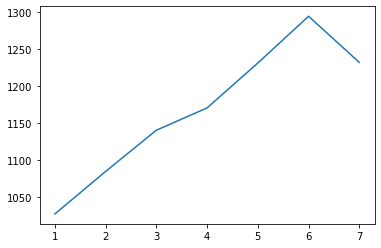

In [18]:
data=[17.24,18.19,19.22,20.11,20.26,22.2,22.44,20.05]
df=pd.DataFrame({'VIXCLS':data})
df['Percent_Change']=df['VIXCLS'].pct_change().fillna(0)

amount=1000

returns_plus_one=df['Percent_Change']+1
cumulative_return = returns_plus_one.cumprod()

df['Cumulative']=cumulative_return.mul(amount)

df['2item']=df['Cumulative'].rolling(window=2).mean().plot()

print(df)

Index(['1-01', '1-02', '1-03', '1-04', '1-05', '1-06', '1-07', '1-08', '1-09',
       '1-10', '1-11', '1-12', '2-01', '2-02', '2-03', '2-04', '2-05', '2-06',
       '2-07', '2-08', '2-09', '2-10', '2-11', '2-12', '3-01', '3-02', '3-03',
       '3-04', '3-05', '3-06', '3-07', '3-08', '3-09', '3-10', '3-11', '3-12'],
      dtype='object', name='Month')


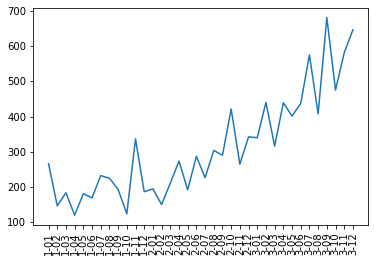

In [31]:
df=pd.read_csv('shampoo.csv',parse_dates=['Month'])
#print(df.columns)
pivot=df.pivot_table(index=['Month'],values=['Sales'],aggfunc=np.sum)
print(pivot.index)
plt.plot(pivot.index,pivot.values)
plt.xticks(rotation=90)
plt.show()

In [40]:
data = {'id': [2, 2, 2, 4, 4], 'time': ['22:17:46', '22:19:02', '22:06:00', '22:18:06', '22:18:06']}
df=pd.DataFrame.from_dict(data)

df['time'] = pd.to_datetime(df['time'])
df['time_diff'] = df.groupby('id')['time'].transform(lambda x: x.max() - x.min())

#grouped=df.groupby('id')['time'].agg(['min', 'max'])
#for item in grouped.items():
#    print(item['min'],item['max'])

print(df)

   id                time       time_diff
0   2 2021-11-16 22:17:46 0 days 00:13:02
1   2 2021-11-16 22:19:02 0 days 00:13:02
2   2 2021-11-16 22:06:00 0 days 00:13:02
3   4 2021-11-16 22:18:06 0 days 00:00:00
4   4 2021-11-16 22:18:06 0 days 00:00:00


In [70]:
print('include only rows landing on wednesday ')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

indices = pd.date_range(start='feb 01 2020', end='nov 30 2020', freq='D')
sr=pd.Series(index=indices, data=np.random.randn(indices.shape[0]))
print(sr[sr.index.dayofweek == 2])

include only rows landing on wednesday 
2020-02-05   -0.589629
2020-02-12    0.934049
2020-02-19   -0.894172
2020-02-26    0.555044
2020-03-04    0.763415
2020-03-11    1.066615
2020-03-18   -0.020870
2020-03-25   -0.918285
2020-04-01    0.360297
2020-04-08    1.253456
2020-04-15    1.440589
2020-04-22   -0.045021
2020-04-29   -0.949664
2020-05-06    2.286289
2020-05-13    0.513542
2020-05-20    0.281833
2020-05-27   -0.567977
2020-06-03    0.539613
2020-06-10    1.009267
2020-06-17   -0.733058
2020-06-24    0.301387
2020-07-01   -0.190711
2020-07-08    1.067948
2020-07-15    1.378977
2020-07-22    0.047785
2020-07-29    0.413142
2020-08-05    0.251642
2020-08-12    0.912417
2020-08-19    0.246275
2020-08-26   -0.972854
2020-09-02    1.655900
2020-09-09   -0.886035
2020-09-16    0.331972
2020-09-23    0.887828
2020-09-30   -2.133704
2020-10-07    1.423253
2020-10-14   -0.419888
2020-10-21    0.526046
2020-10-28   -0.665465
2020-11-04   -1.147253
2020-11-11    2.288207
2020-11-18    0.9